In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
def read_data(f_name):
    column_names = ['User','Activity','Timestamp','X','Y','Z']
    data = pd.read_csv(f_name,header=None,names=column_names)
    data['Z'].replace(regex=True, inplace=True,to_replace=r';',value=r'')
    data['Z'] = data['Z'].astype(np.float64)
    data.dropna(axis=0, how='any', inplace=True)
    data['Timestamp'] = df['Timestamp'].apply(np.int)
    return data

data = read_data('../Data/WISDM_at_v2.0_raw.txt')
data.head()

/Users/narengs7/Anaconda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,User,Activity,Timestamp,X,Y,Z
0,1679,Walking,1370520469556,0.294132,-0.635605,-0.226936
1,1679,Walking,1370520469606,-0.499688,-0.604451,-0.226020
2,1679,Walking,1370520469656,-2.178345,0.713491,0.372017
3,1679,Walking,1370520469706,-2.797763,1.354899,-0.277638
4,1679,Walking,1370520469756,-2.167961,-1.327716,-0.554971


In [69]:
print("Total Users:",len(data['User'].unique()))

Total Users: 225


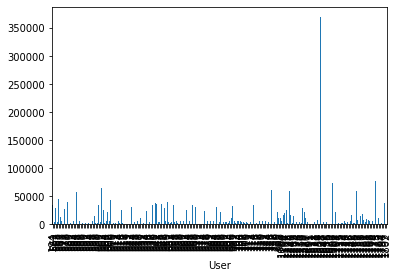

In [70]:
# number of samples by each user
data.groupby(['User']).count()["Activity"].plot(kind='bar')

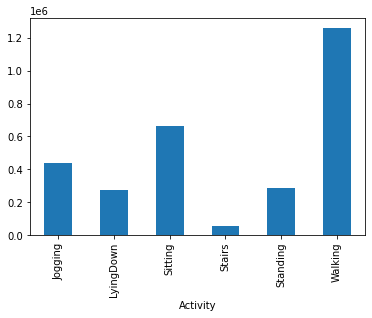

In [71]:
# Various activity sample collected
data.groupby('Activity').count()['User'].plot(kind='bar')

In [72]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_z = StandardScaler()
df = data.copy()
df[["X"]] = sc_x.fit_transform(df[["X"]])
df[["Y"]] = sc_y.fit_transform(df[["Y"]])
df[["Z"]] = sc_z.fit_transform(df[["Z"]])


In [73]:
df.describe()

,User,Timestamp,X,Y,Z
count,2.980765e+06,2.980765e+06,2.980765e+06,2.980765e+06,2.980765e+06
mean,1.025269e+03,1.225001e+12,6.889065e-19,-2.330125e-19,-3.429634e-19
std,4.901956e+02,3.929292e+15,1.000000e+00,1.000000e+00,1.000000e+00
min,1.940000e+02,-4.889433e+18,-5.792102e-04,-1.726489e+03,-5.792102e-04
25%,6.340000e+02,1.200001e+12,-5.792102e-04,5.791962e-04,-5.792102e-04
50%,7.050000e+02,1.317926e+12,-5.792102e-04,5.792043e-04,-5.792102e-04
75%,1.603000e+03,1.372744e+12,-5.792102e-04,5.792346e-04,-5.792102e-04
max,1.802000e+03,4.702603e+18,1.726489e+03,5.795352e-04,1.726489e+03


In [74]:
sc_x.fit_transform(data[["Y"]])

array([[0.00057919],
       [0.00057919],
       [0.0005792 ],
       ...,
       [0.00057915],
       [0.00057913],
       [0.00057918]])

In [75]:
data.describe()

,User,Timestamp,X,Y,Z
count,2.980765e+06,2.980765e+06,2.980765e+06,2.980765e+06,2.980765e+06
mean,1.025269e+03,1.225001e+12,4.844853e+10,-1.373680e+05,1.984417e+14
std,4.901956e+02,3.929292e+15,8.364586e+13,2.371697e+08,3.426074e+17
min,1.940000e+02,-4.889433e+18,-4.628739e+01,-4.094710e+11,-4.820949e+01
25%,6.340000e+02,1.200001e+12,-2.230362e+00,-2.700000e-01,-1.225831e+00
50%,7.050000e+02,1.317926e+12,-2.130529e-03,1.650000e+00,1.160644e-02
75%,1.603000e+03,1.372744e+12,2.508824e+00,8.850000e+00,2.476410e+00
max,1.802000e+03,4.702603e+18,1.444137e+17,8.013994e+01,5.915081e+20


In [89]:
data["Activity"].unique()

array(['Walking', 'LyingDown', 'Standing', 'Sitting', 'Jogging', 'Stairs'],
      dtype=object)

ValueError: min() arg is an empty sequence

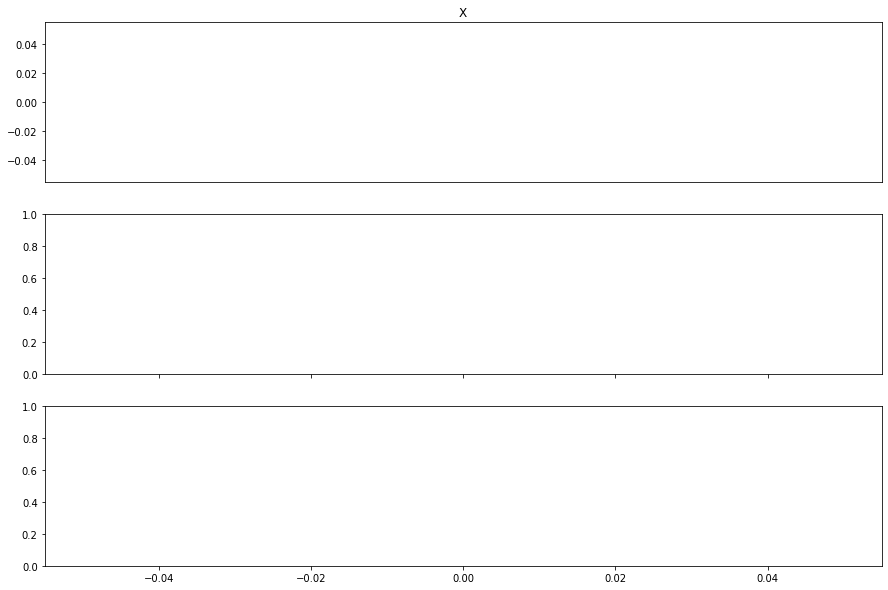

In [91]:
def plot_axis(ax, x, y, title):

    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)


def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['Timestamp'], data['X'], 'X')
    plot_axis(ax1, data['Timestamp'], data['Y'], 'Y')
    plot_axis(ax2, data['Timestamp'], data['Z'], 'Z')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
plot_activity('Sitting',data[(data["Activity"]=='Sitting') & (data["User"]==1679)])

In [78]:
df["Timestamp"].count(),len(df["Timestamp"].unique())

(2980765, 1705798)

ValueError: could not convert string to float: ';'

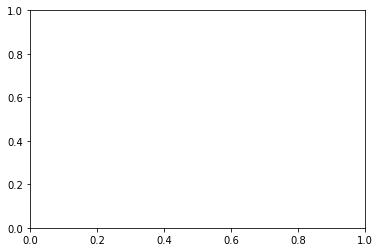